# Praca Domowa 6

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Zadania

### Zadanie 1

a) Narysować wykres y=x^3+1 dla x z przedziału [-3, 3]. Dodać wycentrowany tytuł oraz opisy osi.

b) Do tego samego wykresu dodać wybraną inną funkcję i oznaczyć ją linią o innym kolorze i grubości. Dodać legendę.

c) Pokazać wykresy z a) i b) osobno używając funkcji subplot().

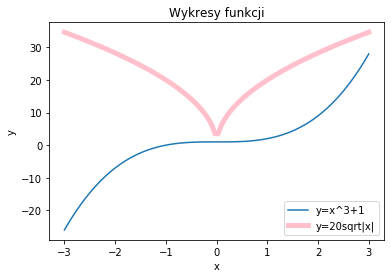

In [2]:
x = np.linspace(-3,3,100)
y_fun = x*x*x+1
y_other = 20* np.sqrt(np.absolute(x))

plt.plot(x, y_fun, label="y=x^3+1")
plt.plot(x, y_other, lw = 5, color="pink", label="y=20sqrt|x|")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykresy funkcji")
plt.legend()
plt.show()



<Figure size 432x288 with 0 Axes>

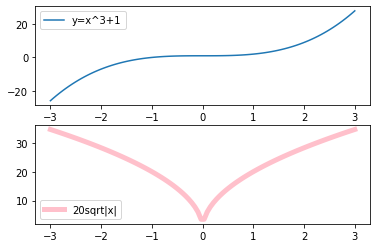

In [3]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(x, y_fun, label="y=x^3+1")
ax2.plot(x, y_other, label="20sqrt|x|", color = "pink", lw = 5)

ax1.legend()
ax2.legend()

plt.show()

# Zadanie 2

a) Narysować wykres słupkowy na podanych danych.

b) Znaleźć sposób (w internecie) na narysowanie wykresu kołowego na podanych danych.
 

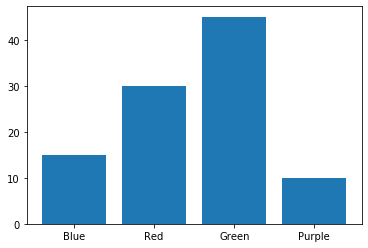

In [4]:
labels = ['Blue', 'Red', 'Green', 'Purple']
sizes = [15, 30, 45, 10]
plt.bar(labels, sizes)
plt.show()

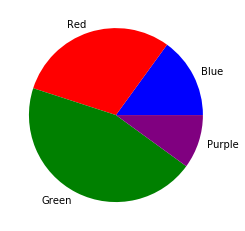

In [5]:
labels = ['Blue', 'Red', 'Green', 'Purple']
sizes = [15, 30, 45, 10]

plt.pie(sizes, labels=labels, colors=['blue', 'red', 'green', 'purple']) # nie mogłem patrzeć, gdy kolory się nie zgadzały
plt.show()

# Zadanie 3

Poprawić wykres tak, aby łatwiej było odczytać w którym województwie śmiertelność wzrosła najbardziej.
Jest przynajmniej kilka innych podejść: scatterplot z latami na osi OX/OY, odcinki zaczynające się w danych ze średniej a kończące w 2020.
Jestem też ciekawa Waszych innych pomysłów.

![https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png](https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png)

Źródło: https://static.im-g.pl/im/7/26498/m26498997,WOJEWODZTWA2.png

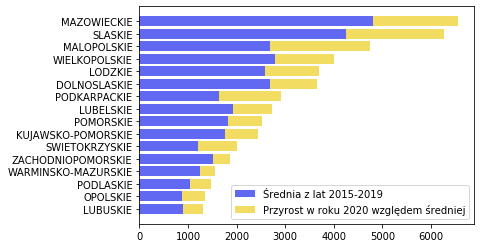

In [6]:
wojewodztwo = ["ZACHODNIOPOMORSKIE", "WIELKOPOLSKIE", "WARMINSKO-MAZURSKIE", "SWIETOKRZYSKIE",  "SLASKIE", "POMORSKIE", "PODLASKIE", "PODKARPACKIE", "OPOLSKIE", "MAZOWIECKIE", "MALOPOLSKIE", "LODZKIE", "LUBUSKIE", "LUBELSKIE", "KUJAWSKO-POMORSKIE", "DOLNOSLASKIE"]

l_2020 = [1874, 4013, 1565, 2008, 6270, 2521, 1468, 2909, 1356, 6564, 4743, 3687, 1313, 2731, 2435, 3665]

l_2015_2019 = [1509, 2796, 1241, 1208, 4255, 1830, 1049, 1643, 881, 4811, 2690, 2578, 894, 1920, 1768, 2683]

delta = []
for i in range(len(l_2020)):
    delta.append(l_2020[i] - l_2015_2019[i])

# sortuję wszystkie listy wg. danych z 2020 r.
for j in range(len(l_2020)):
    for k in range(j, len(l_2020)):
        if l_2020[j] > l_2020[k]:
            delta[j], delta[k] = delta[k], delta[j]
            wojewodztwo[j], wojewodztwo[k] = wojewodztwo[k], wojewodztwo[j]
            l_2020[j], l_2020[k] = l_2020[k], l_2020[j]
            l_2015_2019[j], l_2015_2019[k] = l_2015_2019[k], l_2015_2019[j]
                
#Zacząłem od takigo wykresu, ale skoro interesują nas tylko przyrosty, to stwierdziłem, że spróbuję też zrobić wykres odcinkowy
plt.barh(wojewodztwo, l_2015_2019, color = "#6168f2", label="Średnia z lat 2015-2019")
plt.barh(wojewodztwo, delta, left = l_2015_2019, color = "#f2dc61", label = "Przyrost w roku 2020 względem średniej")

plt.legend()
plt.show()

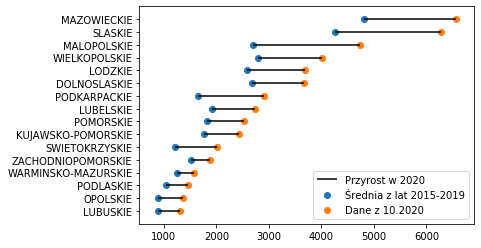

In [9]:
#podstwawowa treść wykresu
plt.hlines(wojewodztwo, l_2015_2019, l_2020, label="Przyrost w 2020")
plt.scatter(l_2015_2019, wojewodztwo, label="Średnia z lat 2015-2019")
plt.scatter(l_2020, wojewodztwo, label="Dane z 10.2020")
plt.legend()
plt.show()

# Zadanie 4

Zrobić własny wykres w stylu xkcd dotyczący wizualzacji danych. Może być bardzo luźno związany.

Jeśli ktoś nie trafił na komiksy xkcd, to polecam przejrzeć zajrzeć na stronę Randalla Munroe: https://xkcd.com/

Tu kilka przykładów, które mogą być inspiracją albo chociaż rozrywką:
- https://xkcd.com/688/
- https://xkcd.com/1597/ - True story jak Wam pokazałam gita :(
- https://xkcd.com/1945/

Matplotlib pozwala na proste tworzenie wykresów w stylu xkcd, służy do tego funkcja `xkcd()` z `matplotlib.pyplot`.
Warto zajrzeć do dokumentacji: https://matplotlib.org/gallery/showcase/xkcd.html
Mój przykład umieściłam poniżej.

Uwaga, w szczególności styl działa też z wykresami kołowymi i słupkowymi.

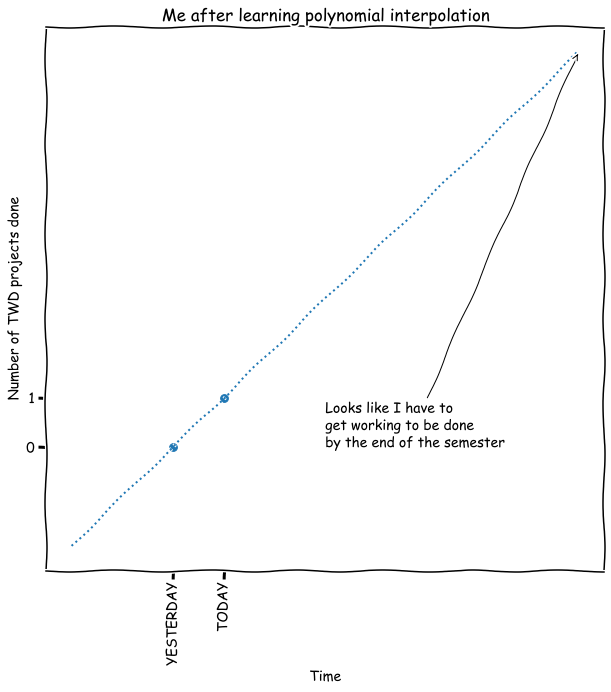

In [42]:
x = [ i for i in range(11)]
y = [ i-2 for i in range(11)]

with plt.xkcd():
    plt.figure(figsize=(10,10))
    plt.xticks([2, 3], ["YESTERDAY", "TODAY"], rotation=90)
    plt.yticks([0, 1])
    
    plt.plot(x, y, ls=":")
    plt.scatter([2, 3],[0, 1], s=60)
    plt.title("Me after learning polynomial interpolation")
    plt.xlabel("Time")
    plt.ylabel("Number of TWD projects done")
    plt.annotate("Looks like I have to\nget working to be done\nby the end of the semester", xy = (10, 8 ), arrowprops=dict(arrowstyle='->'), xytext=(5,0) )

plt.show()

To ja jeszcze dopiszę mój ulubiony z tych powiązanych z TWD:
- [https://xkcd.com/1162/](https://xkcd.com/1162/)